# Capstone Project

## *Pulling Audio Information from Spotify*

This notebook contains a function that can be used to pull information for an album using the album's Spotify URI. This function is tested with several albums, along with some basic EDA of some of the audio features used by Spotify.

The Spotify API is accessed via the Spotipy Python library.

The features of the full `track` object returned by Spotify are explained [here](https://developer.spotify.com/documentation/web-api/reference/tracks/get-several-tracks/).

The audio features for a track are explained [here](https://developer.spotify.com/documentation/web-api/reference/tracks/get-several-tracks/). This information is also included in analysis of the first album below.

#### Table of Contents

* [Function to Pull Audio Features for Album](#write-function)
* [Test Case: Luckier by Half - Dalton & the Sheriffs](#test-dalton)
* [Test Case: Stories - Lannen Fall ](#test-lf)
* [Test Case: Anchor & Chain - Lannen](#test-lannen)
* [Test Case: Coming Home - Falling in Reverse](#test-falling)
* [Test Case: Stick Fingers (Remastered) - The Rolling Stones](#test-stones)

### Import Libraries & Read in Data

In [1]:
## standard imports 
import pandas as pd 
import numpy as np
import seaborn as sns

import re
## visualizations
import matplotlib.pyplot as plt

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# ## options
# import sklearn
# pd.options.display.max_rows = 4000
# pd.options.display.max_columns = 100
# pd.set_option('max_colwidth', 100)

### Spotify API App Key
clientID = 'c85f43a5a7004946996bc22659dd8de6'
clientSecret = '9f6e5b2d26af429ba2c3a77624f85a2d'

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=clientID,
                                                           client_secret=clientSecret))

## Function to Pull Audio Features for Album<a class="anchor" id="write-function"></a>
<hr/>

The following function pulls audio features and popularity for a given album on Spotify. 

The first version (commented below) initially used the `album_tracks` method from the Spotipy API. It was discovered that this returns a 'simplifiied' version of the track information which did not include a track's popularity. The function was rewritten to pull track information separately so that the popularity feature could be collected and combined with the audio features for each track.

In [1]:
### Version 1
# def album_audio_features(URI):
#     album_tracks = sp.album_tracks(URI, market='US')
#     track_list = []
#     raw_track_list = album_tracks['items'].copy()
#     ### note: album tracks does not return popularity metric 
#     for i in range(len(raw_track_list)):
#         track_info = [raw_track_list[i].get('name'), raw_track_list[i].get('track_number'), raw_track_list[i].get('uri'), raw_track_list[i].get('popularity')]
#         track_list.append(track_info)
#     track_info_df = pd.DataFrame(track_list, columns=['track_name', 'track_number', 'track_uri', 'popularity'])
#     track_audio_features = sp.audio_features(tracks=track_info_df['track_uri'].values.tolist())
#     audio_features_df = pd.DataFrame.from_dict(track_audio_features)
#     drop_cols = ['type', 'id', 'uri', 'track_href', 'analysis_url']
#     audio_features_df.drop(columns = drop_cols, inplace=True)
#     album_df = pd.concat([track_info_df, audio_features_df], axis=1)
#     return album_df

In [2]:
### Version 2

def album_audio_features(ID):
    album_tracks_list = sp.album_tracks(ID, market='US')['items']
    
    album_tracks_URI = [album_tracks_list[i].get('uri') for i in range(len(album_tracks_list))]

    track_list = []
    
    raw_track_list = sp.tracks(album_tracks_URI, market='US')['tracks']
    
    track_list = []
    
    for i in range(len(raw_track_list)):
        track_info = [raw_track_list[i].get('name'), raw_track_list[i].get('track_number'), raw_track_list[i].get('uri'), raw_track_list[i].get('popularity')]
        track_list.append(track_info)

    track_info_df = pd.DataFrame(track_list, columns=['track_name', 'track_number', 'track_uri', 'popularity'])

    track_audio_features = sp.audio_features(tracks=track_info_df['track_uri'].values.tolist())

    audio_features_df = pd.DataFrame.from_dict(track_audio_features)

    drop_cols = ['type', 'id', 'uri', 'track_href', 'analysis_url']

    audio_features_df.drop(columns = drop_cols, inplace=True)

    album_df = pd.concat([track_info_df, audio_features_df], axis=1)
    
    return album_df

In [15]:
def plot_audio_features(df, artist_name, album_name):
    df = df.iloc[::-1]
    ### Horizontal subplots
    df.plot.barh(
        x = 'track_name',
        y = ['valence','energy', 'danceability'],
        ylim = [0,1], 
        sharey = True,
        subplots = True, 
        layout = (1,3),
        figsize = (15,5),
        legend = False, 
        title = f'{artist_name} - {album_name}', 
        xlabel = 'Track Name')

## Test Case: Luckier by Half - Dalton & the Sheriffs<a class="anchor" id="test-dalton"></a>
<hr/>

Here we're testing the function written above as well as doing some basic EDA on the audio features for the album.

### Pull audio feature information from Spotify

In [5]:
### Spotify ID: ALBUM - Luckier by Half 
ID = '1v8tMGSGAsAn4KD78DFLq8'

In [6]:
luckier = album_audio_features(ID)
luckier

,track_name,track_number,track_uri,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Tell It Plain,1,spotify:track:69hE9a6camKM2ZALPfckIV,14,0.401,0.810,10,-5.582,1,0.0505,0.001280,0.041400,0.0770,0.338,159.795,243133,4
1,Cheap Seats,2,spotify:track:2pc4JumxjDqZ1b7DPwX33v,11,0.532,0.927,2,-5.255,1,0.0403,0.000868,0.009080,0.3700,0.707,100.024,231867,4
2,California Kid,3,spotify:track:6xaqmNbSGCmjEjiWyEwvA0,9,0.446,0.940,7,-5.263,1,0.0683,0.001020,0.073500,0.2990,0.386,127.941,186333,4
3,The Strummer,4,spotify:track:3E39MkTSUbIds3lY1wcfnL,11,0.326,0.995,7,-3.644,1,0.3500,0.000531,0.389000,0.0548,0.429,216.020,186133,4
4,Holding On,5,spotify:track:4vciFvUV0oLrkKrWrl00dS,11,0.594,0.858,7,-5.757,1,0.0264,0.000470,0.235000,0.1420,0.431,99.999,209400,4
5,Sunday Nights,6,spotify:track:09ybluJcnqeOE39ONdB7Hc,13,0.161,0.961,7,-5.220,1,0.1090,0.000077,0.745000,0.2410,0.298,179.840,217427,4
6,Boston,7,spotify:track:4HJ7mSMtHAdU55lLjGE4zW,15,0.541,0.921,11,-5.250,1,0.0443,0.000520,0.078400,0.1590,0.613,99.980,223440,4
7,Hand-Me-Down,8,spotify:track:3b9nCGWTyf7bTRKPvyC9S8,8,0.296,0.838,0,-6.671,1,0.0375,0.000157,0.130000,0.1400,0.287,98.950,171227,4
8,80 Good,9,spotify:track:3Rt4CW4KLTNlVlpkrfuixM,7,0.411,0.874,1,-5.352,1,0.0356,0.005490,0.432000,0.0995,0.514,179.930,188627,4
9,Her Good Name,10,spotify:track:4tXJMxK2K4ITXRH6z9M26L,8,0.450,0.599,11,-7.444,1,0.0273,0.060100,0.044700,0.1020,0.380,80.647,222880,4


In [17]:
luckier.columns

Index(['track_name', 'track_number', 'track_uri', 'popularity', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature'],
      dtype='object')

In [18]:
luckier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        14 non-null     object 
 1   track_number      14 non-null     int64  
 2   track_uri         14 non-null     object 
 3   popularity        14 non-null     int64  
 4   danceability      14 non-null     float64
 5   energy            14 non-null     float64
 6   key               14 non-null     int64  
 7   loudness          14 non-null     float64
 8   mode              14 non-null     int64  
 9   speechiness       14 non-null     float64
 10  acousticness      14 non-null     float64
 11  instrumentalness  14 non-null     float64
 12  liveness          14 non-null     float64
 13  valence           14 non-null     float64
 14  tempo             14 non-null     float64
 15  duration_ms       14 non-null     int64  
 16  time_signature    14 non-null     int64  
dtyp

In [31]:
def convert_duration(time_ms):
    secs = int((time_ms/1000)%60)
    if secs < 10:
        secs = str('0') + str(secs)
    mins = int((time_ms/(1000*60))%60)
    mins_secs = str(mins) + ':' + secs
    return mins_secs

In [32]:
convert_duration(243133)

4 03 4:03


'4:03'

### EDA on Audio Features

#### Popularity
From Spotify: The value will be an integer between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.

Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity. 
Note that the popularity value may lag actual popularity by a few days: the value is not updated in real time.

*New thought:* if popularity is not updated in real time, maybe it isn't a stretch to pull a dataset for this?

<AxesSubplot:title={'center':'Luckier By Half - Popularity'}, xlabel='Track Name'>

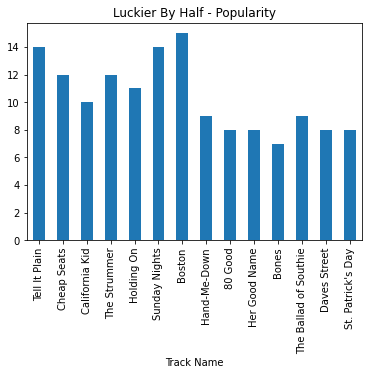

In [97]:
luckier.plot.bar(x = 'track_name', y='popularity', legend=False, title = 'Luckier By Half - Popularity', xlabel='Track Name')
# plt.plot([0, 13],[0.5, 0.5], 'k--')

#### Valence

From Spotify: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). 

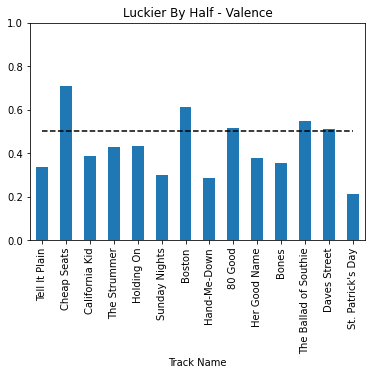

In [43]:
luckier.plot.bar(x = 'track_name', y='valence', ylim=[0,1], legend=False, title = 'Luckier By Half - Valence', xlabel='Track Name')
plt.plot([0, 13],[0.5, 0.5], 'k--')

#### Energy

From Spotify: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

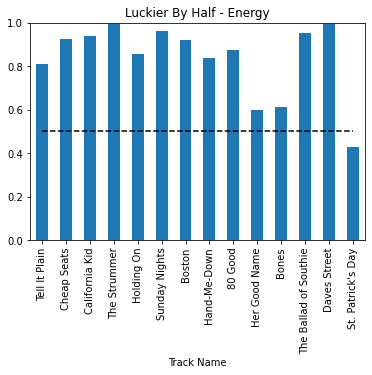

In [44]:
luckier.plot.bar(x = 'track_name', y='energy', ylim=[0,1], legend=False, title = 'Luckier By Half - Energy', xlabel='Track Name')
plt.plot([0, 13],[0.5, 0.5], 'k--')

#### Loudness

From Spotify: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db

<AxesSubplot:title={'center':'Luckier By Half - Loudness'}, xlabel='Track Name'>

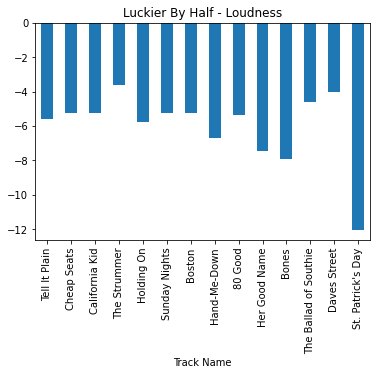

In [48]:
luckier.plot.bar(x = 'track_name', y='loudness', legend=False, title = 'Luckier By Half - Loudness', xlabel='Track Name')
# plt.plot([0, 13],[0.5, 0.5], 'k--')

#### Tempo

The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration

<AxesSubplot:title={'center':'Luckier By Half - Tempo'}, xlabel='Track Name'>

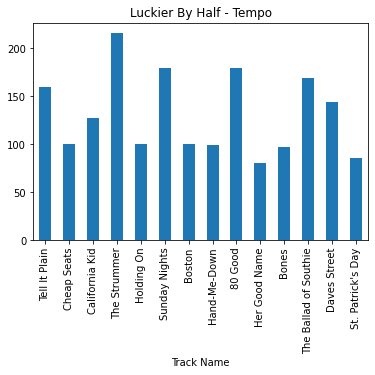

In [49]:
luckier.plot.bar(x = 'track_name', y='tempo', legend=False, title = 'Luckier By Half - Tempo', xlabel='Track Name')
# plt.plot([0, 13],[0.5, 0.5], 'k--')

#### Danceability

Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

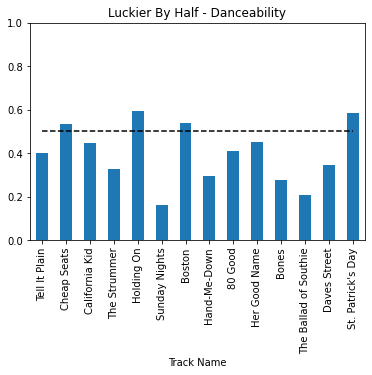

In [45]:
luckier.plot.bar(x = 'track_name', y='danceability', ylim=[0,1], legend=False, title = 'Luckier By Half - Danceability', xlabel='Track Name')
plt.plot([0, 13],[0.5, 0.5], 'k--')

In [5]:
### Horizontal subplots
# luckier.plot.bar(
#     x = 'track_name',
#     y=['valence','energy', 'danceability'],
#     ylim=[0,1], 
#     subplots=True, 
#     layout=(1,3),
#     figsize=(15,5),
#     legend=False, 
#     title = 'Dalton & the Sheriffs - Luckier by Half', 
#     xlabel='Track Name')

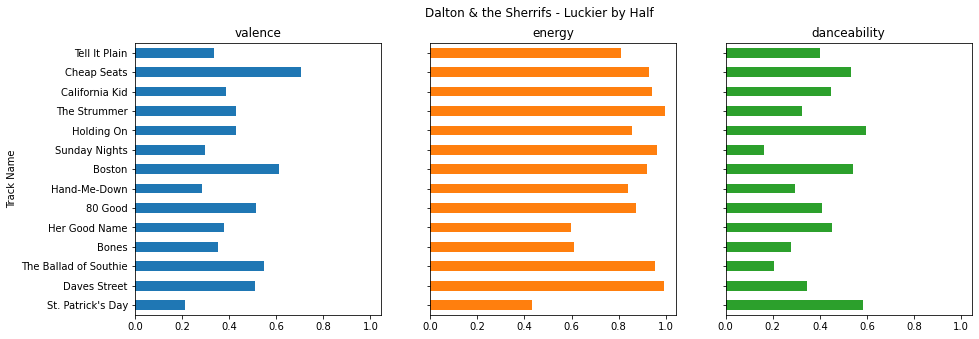

In [16]:
### testing plot function
plot_audio_features(luckier, 'Dalton & the Sherrifs', 'Luckier by Half')

array([[<AxesSubplot:title={'center':'valence'}, xlabel='Track Name'>],
       [<AxesSubplot:title={'center':'energy'}, xlabel='Track Name'>],
       [<AxesSubplot:title={'center':'danceability'}, xlabel='Track Name'>]],
      dtype=object)

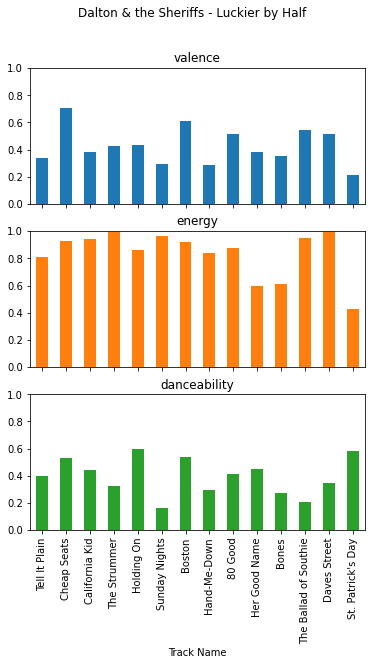

In [98]:
### Vertical subplots
luckier.plot.bar(
    x = 'track_name',
    y=['valence','energy', 'danceability'],
    ylim=[0,1], 
    subplots=True, 
    layout=(3,1),
    figsize=(6,8.5),
    legend=False, 
    title = 'Dalton & the Sheriffs - Luckier by Half', 
    xlabel='Track Name')

array([[<AxesSubplot:title={'center':'valence'}, ylabel='Track Name'>,
        <AxesSubplot:title={'center':'energy'}, ylabel='Track Name'>,
        <AxesSubplot:title={'center':'danceability'}, ylabel='Track Name'>]],
      dtype=object)

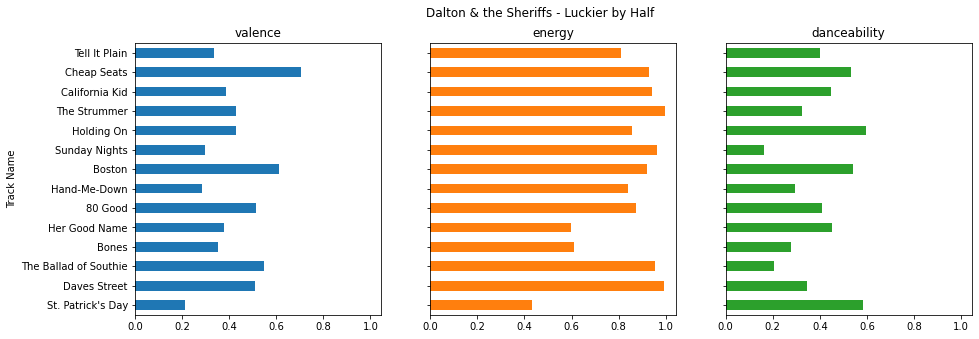

In [12]:
### horizontal subplots
df = luckier.iloc[::-1]
df.plot.barh(
    x = 'track_name',
    y = ['valence','energy', 'danceability'],
    ylim=[0,1], 
    sharey=True,
    subplots=True, 
    layout=(1,3),
    figsize=(15,5),
    legend=False, 
    title = 'Dalton & the Sheriffs - Luckier by Half', 
    xlabel='Track Name')

## Test Case: Stories - Lannen Fall <a class="anchor" id="test-lf"></a>
<hr/>
Here we're testing the function written above as well as doing some basic EDA on the audio features for the album. 

Explanation of Spotify's audio features is skipped here.

### Pull audio feature information from Spotify

In [7]:
storiesURI = 'spotify:album:2Uq7whkQJ3V7iH7MvJqFgk'

In [8]:
stories = album_audio_features(storiesURI)
stories

,track_name,track_number,track_uri,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,My Sweet Pessimist,1,spotify:track:5rP3jRQNA6grv25EBxagBc,2,0.504,0.902,4,-6.455,1,0.0637,0.000031,0.000677,0.1500,0.630,95.984,182000,4
1,Woke Up Screaming,2,spotify:track:4cXdWLcvruvi6OW7we4C7T,2,0.403,0.721,3,-5.714,1,0.0330,0.000032,0.159000,0.1240,0.389,139.963,277320,4
2,Drunk Enough to Dance,3,spotify:track:66gdewcSht2IRxWCr5vWod,0,0.347,0.894,4,-5.700,0,0.0537,0.000146,0.000321,0.3090,0.350,159.894,230840,4
3,She Has A Three,4,spotify:track:0G9pGmlVQKOgV2yRTDUYKy,1,0.446,0.924,9,-5.563,0,0.0411,0.000007,0.020900,0.1060,0.546,94.987,221987,4
4,Lover's Last Rites,5,spotify:track:1FROw0wPN7hzkvM2ygW2Vs,1,0.411,0.862,9,-5.332,1,0.0528,0.000077,0.000003,0.0846,0.588,146.031,182693,4
5,Our Relapse Romance,6,spotify:track:0iWikw97R6AiV8OHo2QLkf,1,0.410,0.903,1,-6.189,0,0.0802,0.000123,0.000001,0.0778,0.287,151.675,270000,4
6,Woke Up Screaming (Acoustic),7,spotify:track:0raaJCcXisvHUrop5a9ODm,1,0.577,0.443,3,-7.355,1,0.0285,0.560000,0.000002,0.0487,0.148,125.108,327320,4


### EDA on Audio Features

array([[<AxesSubplot:title={'center':'valence'}, xlabel='Track Name'>],
       [<AxesSubplot:title={'center':'energy'}, xlabel='Track Name'>],
       [<AxesSubplot:title={'center':'danceability'}, xlabel='Track Name'>]],
      dtype=object)

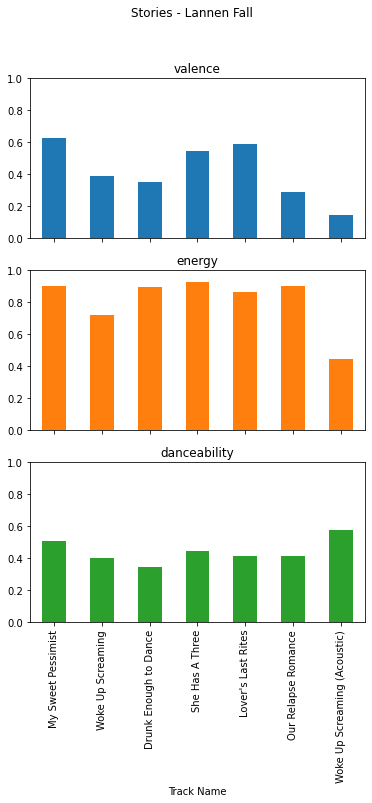

In [88]:
### Vertical subplots
stories.plot.bar(
    x = 'track_name',
    y=['valence','energy', 'danceability'],
    ylim=[0,1], 
    subplots=True, 
    layout=(3,1),
    figsize=(6,10),
    legend=False, 
    title = 'Stories - Lannen Fall',
    xlabel='Track Name')

## Test Case: Anchor & Chain - Lannen <a class="anchor" id="test-lannen"></a>
<hr/>

Here we're testing the function written above as well as doing some basic EDA on the audio features for the album.

### Pull audio feature information from Spotify

In [9]:
anchorURI = 'spotify:album:5sN2Z54X9MUU9oKiEYiG8u'
anchor = album_audio_features(anchorURI)
anchor


,track_name,track_number,track_uri,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Thank You,1,spotify:track:54iLUV8I8HCYincVrZOEBr,0,0.421,0.929,1,-4.331,1,0.0536,0.000086,0.000003,0.6120,0.646,167.970,221338,4
1,Innocent,2,spotify:track:4b65QQyjKPXMIB0M4OJktf,0,0.532,0.859,10,-5.446,1,0.0426,0.000396,0.000454,0.1110,0.234,125.919,231360,4
2,The Songs We Never Sung,3,spotify:track:7LTRD0D63vPsDppddST13a,0,0.415,0.618,10,-5.717,1,0.0335,0.008500,0.000007,0.1100,0.164,144.107,254183,4
3,Sand and the Sea,4,spotify:track:5icp47KJu8dxBRpWXfxDaJ,0,0.625,0.899,0,-5.329,0,0.0419,0.000405,0.000013,0.0353,0.666,134.016,209653,4
4,Let It Ride,5,spotify:track:6BO7kX4ehZywWNlCdxCSsb,0,0.555,0.853,9,-4.658,1,0.0344,0.000083,0.000038,0.0974,0.465,119.990,219732,4
5,Anchor & Chain,6,spotify:track:2V2pJJ2N4dBsXEkEIIkukE,0,0.572,0.543,8,-7.106,1,0.0328,0.014100,0.000030,0.1020,0.217,116.019,229840,4
6,Seasons,7,spotify:track:550tl1unCVKWyQcKgw7vOt,0,0.387,0.903,8,-3.826,0,0.0345,0.001310,0.000005,0.1150,0.645,133.894,185793,4
7,Brooklyn Summer,8,spotify:track:4mOPhPTPwvx6k6colI7xew,0,0.545,0.778,10,-4.990,1,0.0341,0.032000,0.000000,0.1200,0.401,132.022,164849,4
8,Waiting Wolf,9,spotify:track:3uBxUqLfXFieKsm1uirC91,0,0.492,0.861,1,-5.816,1,0.0478,0.019300,0.000002,0.1050,0.296,129.998,234121,4


### EDA on Audio Features

array([[<AxesSubplot:title={'center':'valence'}, xlabel='Track Name'>],
       [<AxesSubplot:title={'center':'energy'}, xlabel='Track Name'>],
       [<AxesSubplot:title={'center':'danceability'}, xlabel='Track Name'>]],
      dtype=object)

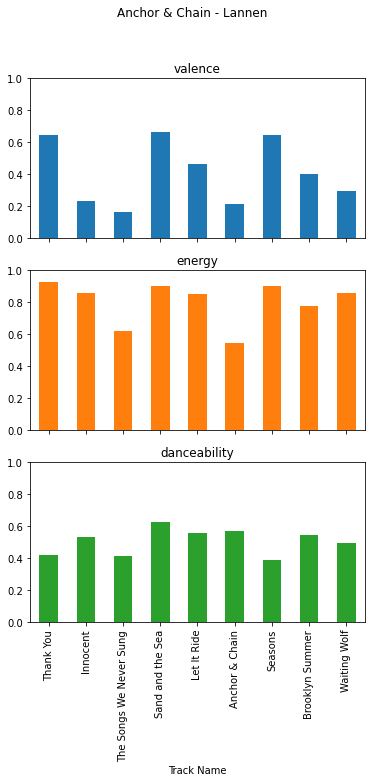

In [96]:
anchor.plot.bar(
    x = 'track_name',
    y=['valence','energy', 'danceability'],
    ylim=[0,1], 
    subplots=True, 
    layout=(3,1),
    figsize=(6,10),
    legend=False, 
    title = 'Anchor & Chain - Lannen',
    xlabel='Track Name')

## Test Case: Coming Home - Falling in Reverse <a class="anchor" id="test-falling"></a>
<hr/>

We're just testing a more well known artist.

In [11]:
URI = 'spotify:album:79fnwKynD56xIXBVWkyaE5'
coming_home = album_audio_features(URI)

In [12]:
coming_home

,track_name,track_number,track_uri,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Coming Home,1,spotify:track:4Jk6ZV8QsuWNLVzjX8VeE6,56,0.219,0.930,11,-3.348,1,0.1140,0.002140,0.000000,0.1380,0.3200,123.511,294039,4
1,Broken,2,spotify:track:5IwdHDiLWES2K4XtUjKn4A,51,0.476,0.988,2,-4.301,0,0.3170,0.003990,0.000000,0.2530,0.1420,140.113,234805,4
2,Loser,3,spotify:track:4VXhicGRlRz7Z4OQUOzkpT,53,0.449,0.980,10,-3.187,1,0.2500,0.001870,0.000004,0.1220,0.0533,95.479,253453,4
3,Fuck You and All Your Friends,4,spotify:track:6uSpReaIE9rsnvhmpsJClE,54,0.340,0.985,4,-2.505,1,0.2360,0.000198,0.000003,0.3900,0.2540,172.026,191248,4
4,I Hate Everyone,5,spotify:track:5ElqFDw0Rn1tkdaJpDJSrx,47,0.263,0.946,4,-2.882,1,0.1340,0.001400,0.000000,0.1230,0.3560,171.914,218536,4
5,I'm Bad At Life,6,spotify:track:2uEhFDZqAjzflscjStpmzd,52,0.439,0.918,8,-3.434,1,0.1100,0.003850,0.000000,0.1240,0.2610,139.975,235334,4
6,Hanging On,7,spotify:track:0unL0Fgezp3ts4aFtT2FB5,47,0.451,0.972,5,-3.212,1,0.1500,0.000978,0.000002,0.2570,0.3760,89.980,228183,4
7,Superhero,8,spotify:track:2b5wWbvt1IPBEMczBPtuB1,52,0.350,0.971,1,-2.842,0,0.0821,0.000424,0.000000,0.2160,0.5130,173.023,193447,4
8,Straight to Hell,9,spotify:track:4UAdIHc0paTuEJkZWgPiIq,46,0.293,0.971,4,-3.542,0,0.2740,0.000900,0.000002,0.1980,0.2080,172.139,229569,4
9,I Don't Mind,10,spotify:track:5y6znJ3osgBVDzis8xcNTJ,46,0.333,0.925,11,-3.921,0,0.0821,0.000678,0.006290,0.1350,0.1320,160.067,263897,4


### EDA on Audio Features

array([[<AxesSubplot:title={'center':'valence'}, xlabel='Track Name'>],
       [<AxesSubplot:title={'center':'energy'}, xlabel='Track Name'>],
       [<AxesSubplot:title={'center':'danceability'}, xlabel='Track Name'>]],
      dtype=object)

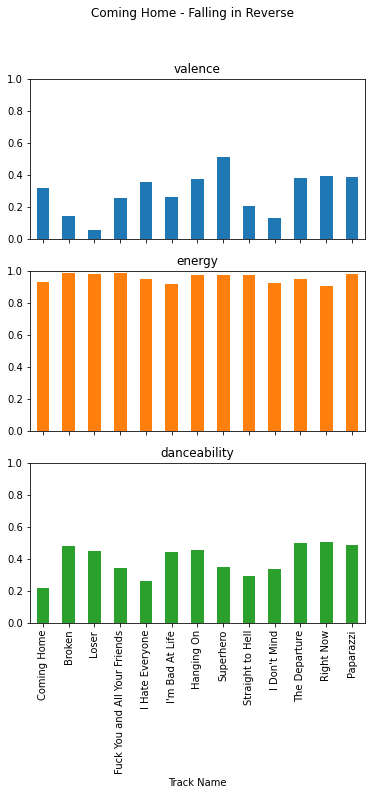

In [13]:
coming_home.plot.bar(
    x = 'track_name',
    y=['valence','energy', 'danceability'],
    ylim=[0,1], 
    subplots=True, 
    layout=(3,1),
    figsize=(6,10),
    legend=False, 
    title = 'Coming Home - Falling in Reverse',
    xlabel='Track Name')

## Test Case: Stick Fingers (Remastered) - The Rolling Stones <a class="anchor" id="test-stones"></a>
<hr/>

We're testing with a very well known artist. Valence seemed to be super low for artists I chose to use above. Is most music rated this low? 

We wanted to see if this was true for a very well known artist. 

In [14]:
stickyURI = 'spotify:album:29m6DinzdaD0OPqWKGyMdz'
sticky = album_audio_features(stickyURI)
sticky

,track_name,track_number,track_uri,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Brown Sugar - 2009 Mix,1,spotify:track:61UuPxxYUvacEH6SHIK3sU,70,0.633,0.934,0,-3.594,1,0.0344,0.2190,0.000210,0.0592,0.963,128.606,228667,4
1,Sway - 2009 Mix,2,spotify:track:1ZS5HBMAmZk3gjFcedts66,47,0.330,0.895,5,-3.435,1,0.0399,0.2210,0.737000,0.4080,0.540,144.945,232533,4
2,Wild Horses - 2009 Mix,3,spotify:track:52dm9op3rbfAkc1LGXgipW,72,0.432,0.389,7,-6.517,1,0.0255,0.6870,0.010700,0.0788,0.158,139.506,341773,4
3,Can't You Hear Me Knocking - 2009 Mix,4,spotify:track:1hIQPCM3oWXrpnXmgTDaKG,65,0.545,0.757,0,-5.228,1,0.0396,0.4080,0.045000,0.1600,0.714,152.217,436000,4
4,You Gotta Move - 2009 Mix,5,spotify:track:4uhJps8XVlPZbdI5ZArAUO,44,0.439,0.422,0,-8.384,1,0.0312,0.7240,0.203000,0.1520,0.564,70.283,152107,4
5,Bitch - 2009 Mix,6,spotify:track:01JYvQ6udfhUw9Jed9EzoK,49,0.655,0.972,7,-3.502,1,0.0362,0.2570,0.297000,0.1650,0.973,135.922,217093,4
6,I Got The Blues - 2009 Mix,7,spotify:track:6WvgizUMVUdPksmm7BMfnm,45,0.442,0.382,7,-5.295,1,0.0317,0.4670,0.021600,0.1210,0.199,119.947,233693,3
7,Sister Morphine - 2009 Mix,8,spotify:track:1XaL1OWGibGlPqLUW9MnCX,45,0.395,0.579,9,-7.565,0,0.0341,0.0943,0.092500,0.1760,0.218,90.443,331627,4
8,Dead Flowers - 2009 Mix,9,spotify:track:3oJtUnnt5uYPtzulIbLw3D,57,0.540,0.862,2,-4.599,1,0.0284,0.3300,0.000017,0.1560,0.931,130.340,244533,4
9,Moonlight Mile - 2009 Mix,10,spotify:track:3w7hnMNX4zVZeBJ6LisTjT,56,0.417,0.500,7,-6.449,1,0.0263,0.5750,0.088300,0.1020,0.241,130.531,357200,4


### EDA on Album

array([[<AxesSubplot:title={'center':'valence'}, xlabel='Track Name'>],
       [<AxesSubplot:title={'center':'energy'}, xlabel='Track Name'>],
       [<AxesSubplot:title={'center':'danceability'}, xlabel='Track Name'>]],
      dtype=object)

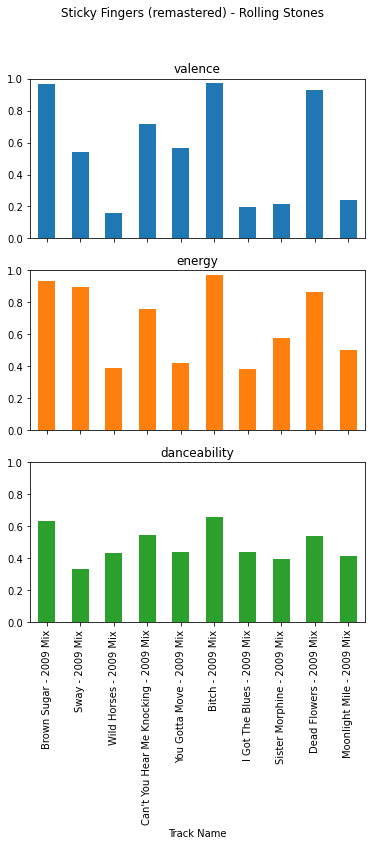

In [15]:
sticky.plot.bar(
    x = 'track_name',
    y=['valence','energy', 'danceability'],
    ylim=[0,1], 
    subplots=True, 
    layout=(3,1),
    figsize=(6,10),
    legend=False, 
    title = 'Sticky Fingers (remastered) - Rolling Stones',
    xlabel='Track Name')

Valence looks higher here for several tracks, so not all music is on the sadder side 😅